In [1]:
import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

%matplotlib inline

In [17]:
def get_spectrum_data_and_wavelength(file):
    spec_data = pf.getdata(file)
    spec_header = pf.getheader(file)
    
    wl_i = spec_header['CRVAL1'] # Coordinate value of position in degrees, specified in CRPIX.
    wl_step = spec_header['CDELT1'] # Increment-per-pixel of axis n, in degrees
    wavelength = np.arange(spec_data.size)*wl_step+wl_i
    
    return spec_data, wavelength

In [18]:
def normalize_spectrum(spec_data, wavelength, step = 0.05):
    wl_max = wavelength.max()
    wl_min = wavelength.min()
    flx_max = spec_data.max()
    flx_min = spec_data.min()
    
    interpolation_function = interp.interp1d(wavelength, spec_data) # INTERPOLATE TO SAME WAVELENGTH GRID 
    
    new_wavelength = np.arange(wl_min, wl_max, step)
    new_flux = np.arange(flx_min, flx_max)
    new_flux = interpolation_function(new_wavelength)
    
    return new_wavelength, new_flux

In [19]:
def plot_spectrum(new_wavelength, new_flux):
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.plot(new_wavelength, new_flux, '-')
    plt.xlabel(r"Wavelength ($\mathrm{\AA}$)")
    plt.ylabel(r"Flux")
    plt.show()

In [31]:
def plot_normalized_spectrum(file):
    flux, wl = get_spectrum_data_and_wavelength(file)
#     new_wl, new_flux = normalize_spectrum(flux, wl)
    plot_spectrum(wl, flux)
    print(wl)

# Trying to understand file structure

In [32]:
obs_X0319 = 'spectra/X0319/X0319_V_O_E.fits'
tel_X0319 = 'spectra/X0319/X0319_V_O_E_TRA.fits'
corrected_X0319 = 'spectra/X0319/X0319_V_O_E_TAC_final.fits'

In [33]:
obs_ftfile = pf.open(obs_X0319)

In [34]:
obs_ftfile[0].header

SIMPLE  =                    T /image conforms to FITS standard                 
BITPIX  =                  -64 /bits per data value                             
NAXIS   =                    1 /number of axes                                  
NAXIS1  =                32423 /                                                
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2016-04-29T05:16:53' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
LAMNLIN =                 3727 / No. of lines used in wavelength solution       
LAMRMS  =  0.00558395155641321 / RMS of wavelength solution [CUNIT1]            
CRDER1  = 9.14664756893955E-05 / Wavelength uncertainty [CUNIT1]                
CSYER1  =                 0.02 / Typical systematic wavelength error [CUNIT1]   
CUNIT1  = 'nm      '        

In [35]:
obs_ftfile[0].data

array([228593.078125, 858789.625   , 909601.9375  , ..., 134238.5     ,
       133857.859375, 134520.09375 ])

In [36]:
len(obs_ftfile[0].data)

32423

In [37]:
obs_ftfile[1].header

XTENSION= 'IMAGE   '           / Written by IDL:  Mon Aug  1 05:02:57 2016      
BITPIX  =                  -64 / Number of bits per data pixel                  
NAXIS   =                    1 / Number of data axes                            
NAXIS1  =                32423 /                                                
PCOUNT  =                    0 / number of random group parameters              
GCOUNT  =                    1 / number of random groups                        
DATE    = '2016-08-01'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
CRVAL1  =        533.670000000 /                                                
CDELT1  =      0.0150000000000 /                                                
CD1_1   =      0.0150000000000 /                                                
DC-FLAG =                   

In [38]:
obs_ftfile[1].shape

(32423,)

In [39]:
obs_ftfile[1].data

array([1.56750587e+06, 1.03980220e+06, 7.31170643e+05, ...,
       7.30458846e+02, 7.30864941e+02, 7.34419882e+02])

# Using previous functions on new data

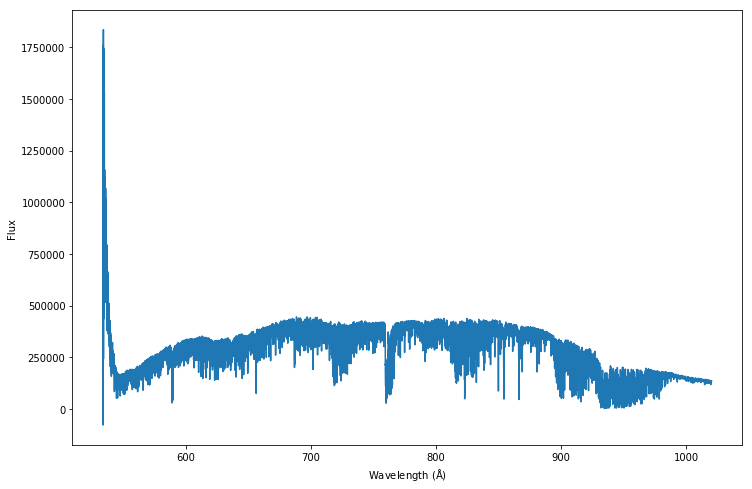

[ 533.67   533.685  533.7   ... 1019.97  1019.985 1020.   ]


TypeError: 'NoneType' object is not iterable

In [40]:
new_wl_X0319, obs_flux_X0319 = plot_normalized_spectrum(obs_X0319)

# ENTENDER ESTRUTURA DOS ARQUIVOS X-SHOOTER